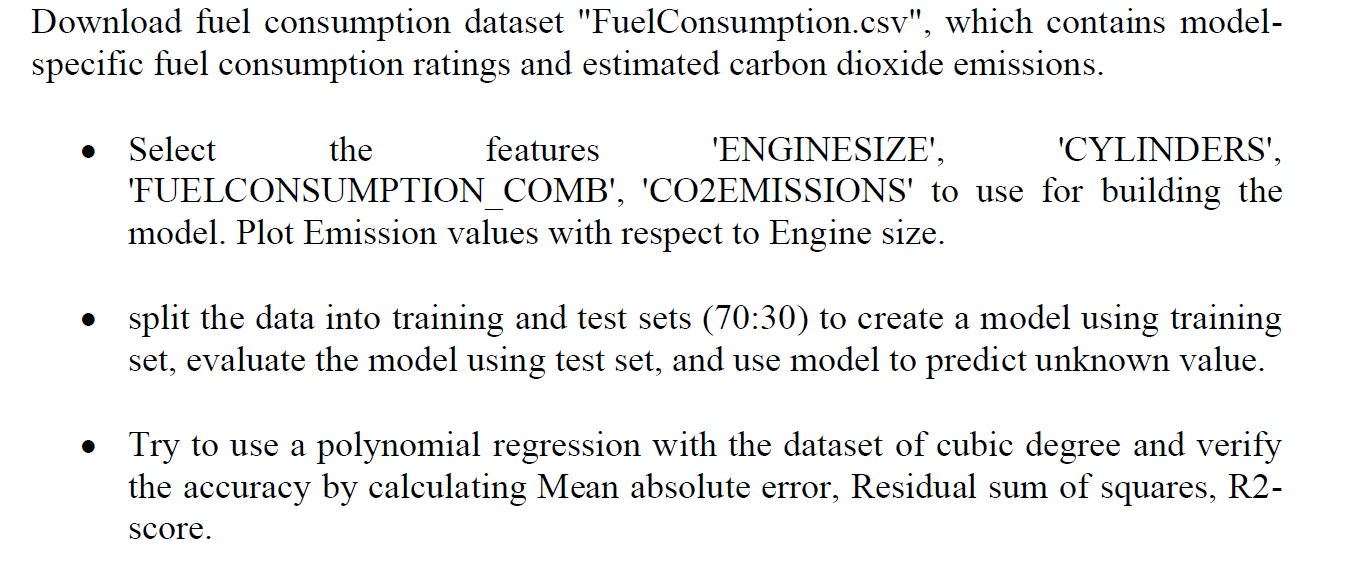

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Polynomial Regression with FuelConsumption.csv

In [ ]:
fc = pd.read_csv('FuelConsumption.csv')
fc.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
fc.isnull().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [ ]:
fc.shape

(1067, 13)

In [ ]:
fc.columns

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

## Feature Selection

In [ ]:
X = fc[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = fc['CO2EMISSIONS']

In [ ]:
X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6


In [ ]:
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

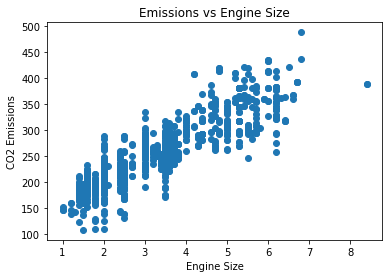

In [ ]:
plt.scatter(X['ENGINESIZE'], y)
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.title('Emissions vs Engine Size')
plt.show()

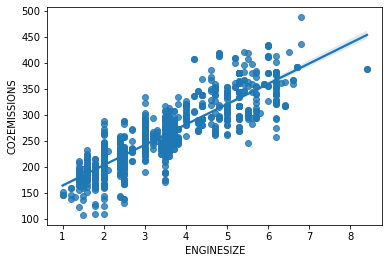

In [ ]:
sns.regplot(x = 'ENGINESIZE', y = 'CO2EMISSIONS', data = fc)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

## Data split for model train and test 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

## Polynomial Regression and Model Evaluation 

In [ ]:
def poly_reg(X_train, X_test, y_train, y_test, l, u):
    lr = LinearRegression()
    print('Metrics of various degree polynomial regression:')
    for i in range(l, u+1):
        poly = PolynomialFeatures(degree = i)
        X_train_trans = poly.fit_transform(X_train)
        X_test_trans = poly.transform(X_test)
        lr.fit(X_train_trans, y_train)
        y_pred = lr.predict(X_test_trans)
        r2 = metrics.r2_score(y_test, y_pred)
        mae = metrics.mean_absolute_error(y_test, y_pred)
        rss = metrics.mean_squared_error(y_test, y_pred) * y_test.shape[0]
        print('\nDegree', i)
        print('r2 score:', r2)
        print('Mean Absolute Error:', mae)
        print('Sum of Squared Residuals:', rss)

In [ ]:
poly_reg(X_train, X_test, y_train, y_test, l = 3, u = 5)

Metrics of various degree polynomial regression:

Degree 3
r2 score: 0.9322474349854076
Mean Absolute Error: 10.230711579367137
Sum of Squared Residuals: 87722.80578346297

Degree 4
r2 score: 0.9359316964620019
Mean Absolute Error: 9.645981137997635
Sum of Squared Residuals: 82952.5988710433

Degree 5
r2 score: 0.9426167075750426
Mean Absolute Error: 8.255203275108634
Sum of Squared Residuals: 74297.16373876068


Model with degree 5 gives us the best performance among the 3.     
It has the highest r2 score and the least mean absolute error and rss